# Table of content

- 1. Import libraries
- 2. Set path
- 3. Import file
- 4. Check data
- 5. Merging files
- 6. Creating subsets
    - 6.1 Plotting Time series
- 7. Decomposition
- 8. Test for stationarity
- 9. Stationarizing

# 1. Import libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 2. Set Path

In [2]:
path= r'/Users/phongsathorn/Documents/Data Analytics/CareerFoundry/Achievement 6 - AirBnB Projet'

# 3. Import data

In [3]:
df=pd.read_pickle(os.path.join(path,'02 Data','AirBnB Amsterdam','listings_airbnb_netherlands_CLEAN_map.pkl'))
calendar= pd.read_csv(os.path.join(path,'02 Data','AirBnB Amsterdam','calendar_amsterdam.csv'),usecols=['date','listing_id','available'])

# 4. Check data

In [4]:
df.dtypes

listing_id                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
property_type                      object
accommodates                        int64
first_review                       object
review_scores_value               float64
review_scores_cleanliness         float64
review_scores_location            float64
review_scores_accuracy            float64
review_scores_communication       

In [5]:
calendar.dtypes

listing_id     int64
date          object
available     object
dtype: object

#### Change data type

In [6]:
#change date datatype
calendar['date'] = pd.to_datetime(calendar['date'])

In [7]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
dtype: object

In [8]:
df.head()

,listing_id,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,...,host_response_time,host_response_rate,street,market,neighbourhood_cleansed,host_identity_verified,instant_bookable,price_per_night,has_license,Price_class
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,within an hour,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price
1,1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",Amsterdam,Westerpark,t,f,40.000000,No License,Mid price
2,2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-Oost,f,f,80.000000,No License,High price
3,3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-West,f,f,8.928571,No License,Low price
4,4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,...,within an hour,100.0,"Amsterdam, North Holland, Netherlands",Amsterdam,Centrum-West,t,t,75.000000,No License,High price


In [9]:
calendar.head()

,listing_id,date,available
0,2818,2019-12-05,f
1,73208,2019-08-30,f
2,73208,2019-08-29,f
3,73208,2019-08-28,f
4,73208,2019-08-27,f


In [10]:
# change column name in calendar 
calendar.rename(columns={'listing_id':'id'},inplace=True)
calendar.head()

,id,date,available
0,2818,2019-12-05,f
1,73208,2019-08-30,f
2,73208,2019-08-29,f
3,73208,2019-08-28,f
4,73208,2019-08-27,f


# 5. Merging files

In [11]:
## Merging calendar with df on 'id'

df_merge=df.merge(calendar, on ='id', how='left')

In [12]:
df_merge.head()

,listing_id,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,...,street,market,neighbourhood_cleansed,host_identity_verified,instant_bookable,price_per_night,has_license,Price_class,date,available
0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price,2019-12-05,f
1,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price,2019-12-04,f
2,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price,2019-12-03,f
3,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price,2019-12-02,f
4,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,"Amsterdam, North Holland, Netherlands",Amsterdam,Oostelijk Havengebied - Indische Buurt,f,t,19.666667,No License,Low price,2019-12-01,f


# 6. Creating subset for accommodates = 2

**NOTE**

For the time series i will create a subset that only includes the listings with accommodates == 2 because those are the majority of the listings.

I will count the numbers of availability by choosing "t" in available as free to book.

This way i can check how many listings with accommodates= 2 are available on each specific day of the time series

In [13]:

sub= df_merge[df_merge['accommodates']==2]

In [14]:
# selecting only certain columns

sub=sub[['date','price_per_night','available']]

In [15]:
# create subset with the counts of available = 't' for each value of date

sub_price = sub[sub['available'] == 't'].groupby('date').size().transpose()

In [16]:
sub_price=pd.DataFrame(sub_price)
sub_price

,0
date,
2018-12-06,606
2018-12-07,708
2018-12-08,871
2018-12-09,1550
2018-12-10,1774
...,...
2019-12-02,1533
2019-12-03,1532
2019-12-04,1544


In [17]:
# rename column
sub_price.rename(columns={'0':'available listings'},inplace=True)

In [18]:
sub_price.columns

Index([0], dtype='int64')

## 6. 1 Plotting time series

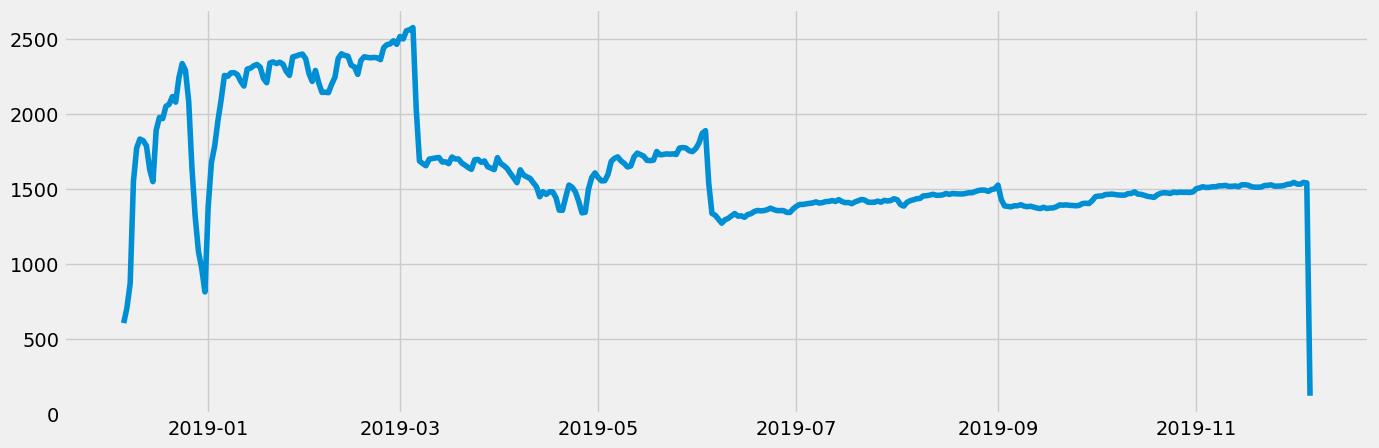

In [19]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sub_price)

**NOTE**

1 year time period :
- start: 2018-12-06
- end: 2019-12-06

In [20]:
# check for missing values

sub_price.isnull().sum()

0    0
dtype: int64

In [21]:
# check for duplicates
sub_price.duplicated().sum()

88

**NOTE**

Duplicates can be retained since some day there will be the same amount of available listings when nothing was booked

# 7. Decomposition

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_price, model='multiplicative')

**NOTE**

Chose "multiplicative" because the number of avaiable listings dont follown an order but rather jumps irregulary

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

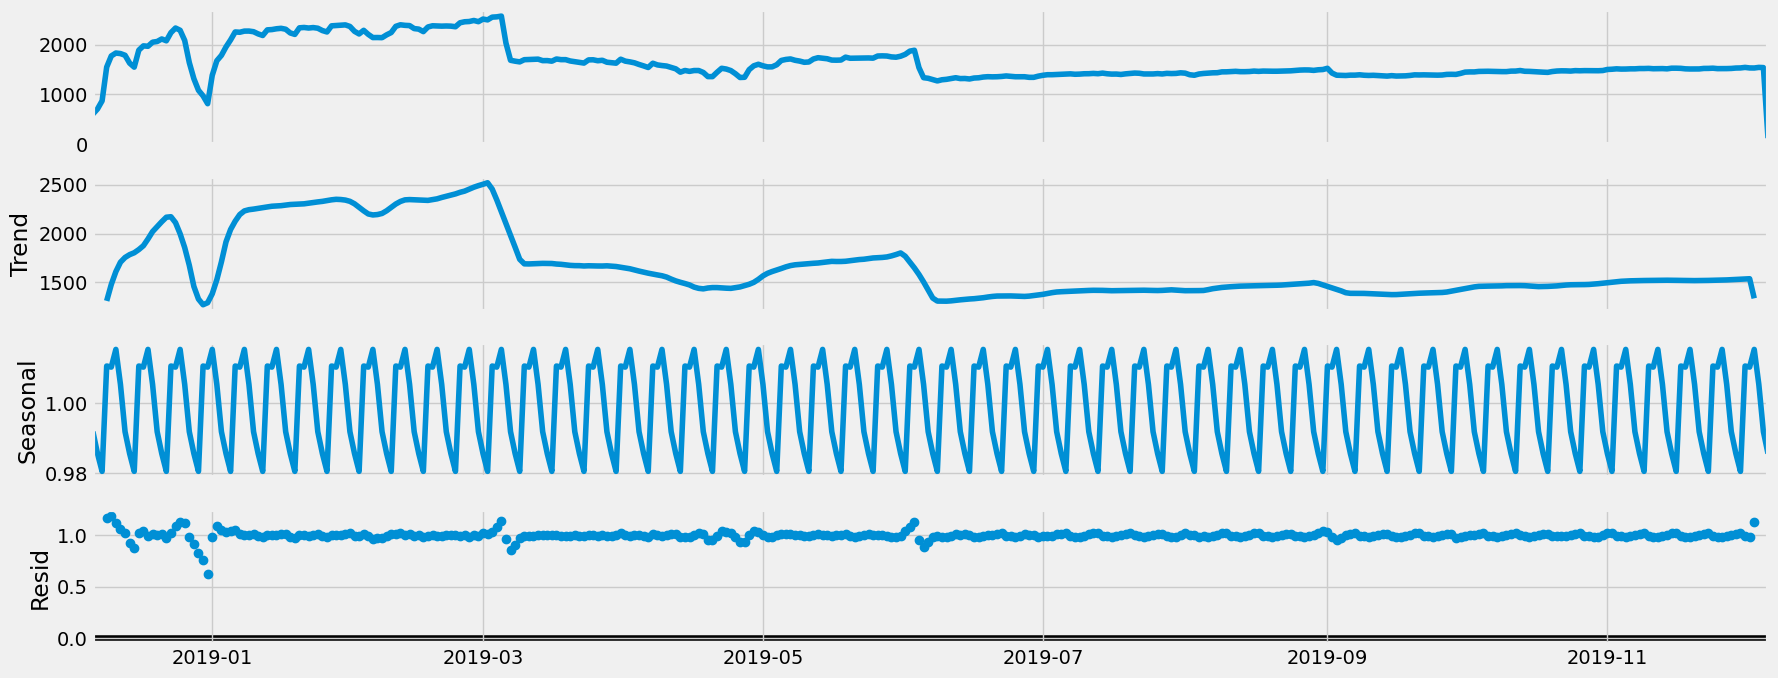

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

**NOTE**

Data set is not different that trend since both display similar development of the line.

* this idicates that there is not much noise

* Seasonality: repeating fluctuations shows as spikes that changes at a regular intervall

* Not much noise exept for the time around 2019-01, 2019-03 and 2019-06

# 8. Test for stationarity

In [27]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_price[0])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.741270
p-value                          0.835768
Number of Lags Used             10.000000
Number of Observations Used    355.000000
Critical Value (1%)             -3.448906
Critical Value (5%)             -2.869716
Critical Value (10%)            -2.571126
dtype: float64


**NOTE**

- The test statistics > critical value(5%) --> H0 accepted = non-stationary

- p-value > 0.05 --> H0 accepted = non-stationary

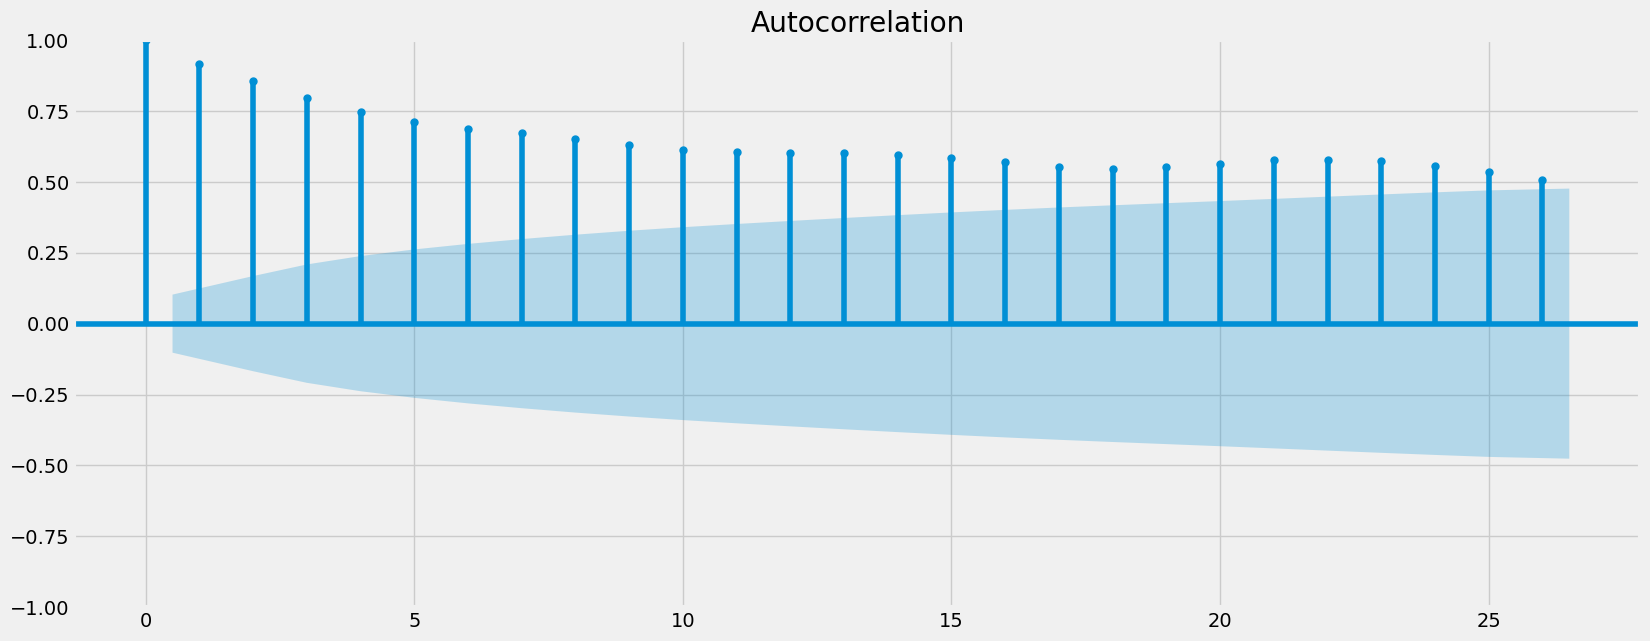

In [28]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub_price)
plt.show()

**NOTE**

Autocorrelation shows many lags that are beyond confidence intervall and therefore is the time series non-stationary

# 9. Stationarizing the data 

### Differencing

In [29]:
data_diff = sub_price - sub_price.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [30]:
data_diff.dropna(inplace = True) 

In [31]:
data_diff.head()

,0
date,
2018-12-07,102.0
2018-12-08,163.0
2018-12-09,679.0
2018-12-10,224.0
2018-12-11,59.0


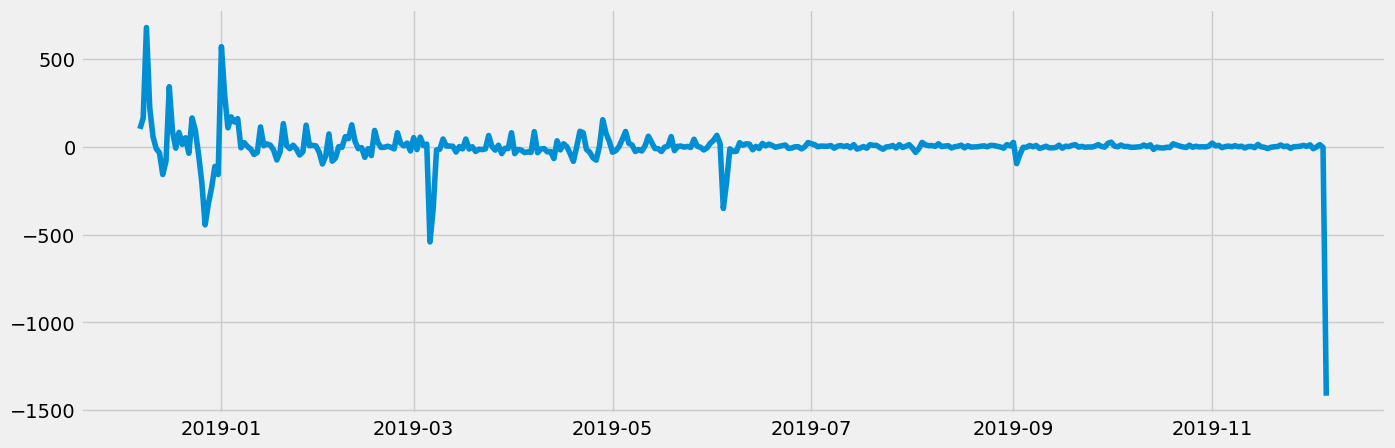

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.704461e+00
p-value                        7.544160e-07
Number of Lags Used            9.000000e+00
Number of Observations Used    3.550000e+02
Critical Value (1%)           -3.448906e+00
Critical Value (5%)           -2.869716e+00
Critical Value (10%)          -2.571126e+00
dtype: float64


**NOTE**

- Test statistics < Critical value(5%) --> H1 accepted = stationary
- p_value < 0.05 = H1 accepted = stationary



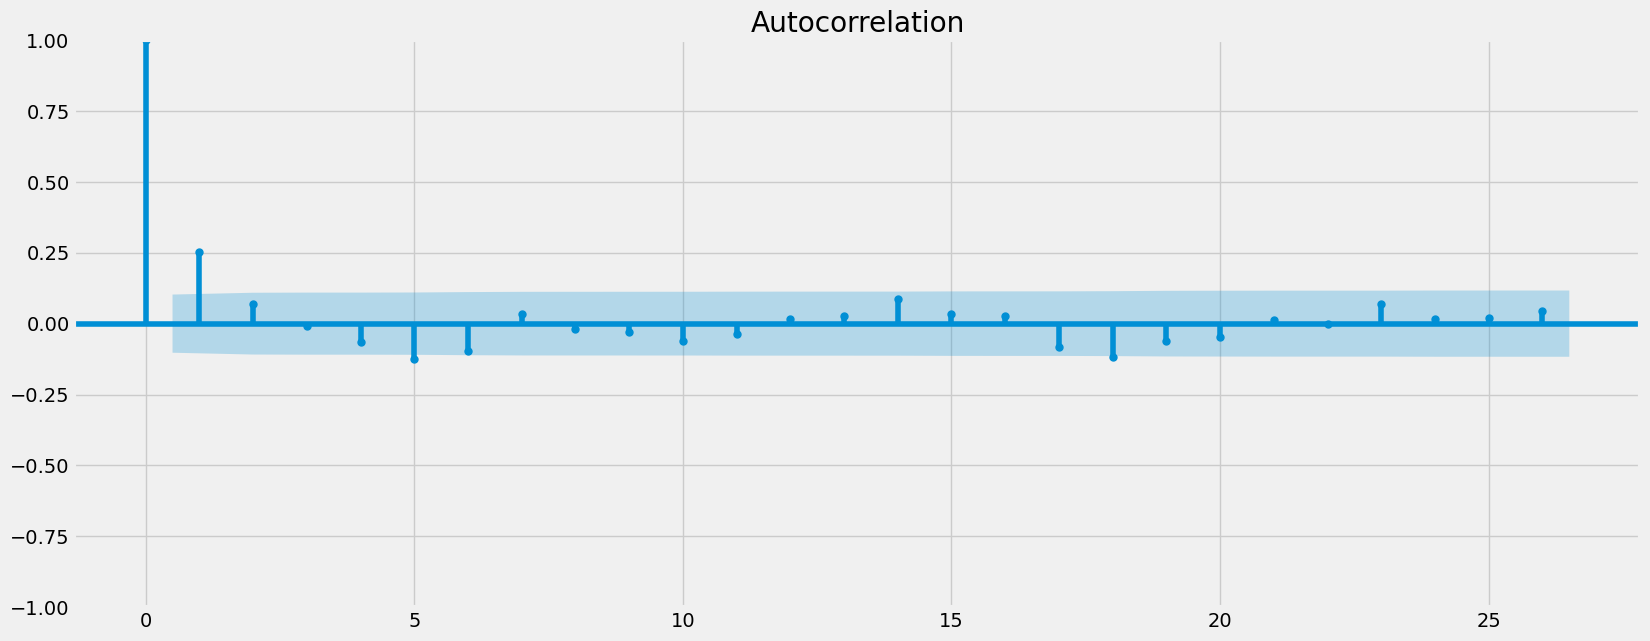

In [34]:
plot_acf(data_diff)
plt.show()

**NOTE**

Althoug 2 lags are left which are beyond confidence intervall, we can assume that the data is now stationary.

